# Imports

In [142]:
import spotipy
from decouple import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

# Authentication

In [117]:
token = spotipy.util.prompt_for_user_token(client_id= config("SPOTIFYID"), client_secret= config("SPOTIFYPASSWORD"), redirect_uri='http://mysite.com/callback/', 
    scope='playlist-read-private user-modify-playback-state playlist-modify-public user-read-recently-played user-follow-read user-follow-modify')
sp = spotipy.Spotify(auth=token)

In [118]:
USER = "392uowv8fh00b9ie6ccn9cegs"

# Data Collection

## Artists

Details which are needed are:
1. Artist ID
2. Name
3. Genre
4. Popularity
5. Image
6. Spotify URL
7. Followers

In [126]:
following = sp.current_user_followed_artists(limit=50, after=None)

In [127]:
artists_raw = pd.DataFrame(following['artists']['items'])
artists_raw.head(2).T

,0,1
external_urls,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/0...
followers,"{'href': None, 'total': 923384}","{'href': None, 'total': 59135608}"
genres,"[classic bollywood, classic pakistani pop, fil...",[pop]
href,https://api.spotify.com/v1/artists/02Um2HIOrUd...,https://api.spotify.com/v1/artists/06HL4z0CvFA...
id,02Um2HIOrUdsy3wqPBZwsj,06HL4z0CvFAxyc27GXpf02
images,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 640, 'url': 'https://i.scdn.co/ima..."
name,Hemant Kumar,Taylor Swift
popularity,52,94
type,artist,artist
uri,spotify:artist:02Um2HIOrUdsy3wqPBZwsj,spotify:artist:06HL4z0CvFAxyc27GXpf02


In [128]:
artists = artists_raw[['id', 'name', 'genres', 'popularity', 'uri', "external_urls", "followers", "images"]]
artists.head(2).T

,0,1
id,02Um2HIOrUdsy3wqPBZwsj,06HL4z0CvFAxyc27GXpf02
name,Hemant Kumar,Taylor Swift
genres,"[classic bollywood, classic pakistani pop, fil...",[pop]
popularity,52,94
uri,spotify:artist:02Um2HIOrUdsy3wqPBZwsj,spotify:artist:06HL4z0CvFAxyc27GXpf02
external_urls,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/0...
followers,"{'href': None, 'total': 923384}","{'href': None, 'total': 59135608}"
images,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 640, 'url': 'https://i.scdn.co/ima..."


In [129]:
artists["spotify_url"] = artists["external_urls"].apply(lambda x: x["spotify"])

In [130]:
artists["followers"] = artists["followers"].apply(lambda x: x["total"])

In [131]:
def get_image_url(x):
    if x:
        return x[0]["url"]
    else:
        return None

In [132]:
artists["image_url"] = artists["images"].apply(get_image_url)


In [133]:
artists.drop(columns=["external_urls", "images"], inplace=True)
artists.head(2).T

,0,1
id,02Um2HIOrUdsy3wqPBZwsj,06HL4z0CvFAxyc27GXpf02
name,Hemant Kumar,Taylor Swift
genres,"[classic bollywood, classic pakistani pop, fil...",[pop]
popularity,52,94
uri,spotify:artist:02Um2HIOrUdsy3wqPBZwsj,spotify:artist:06HL4z0CvFAxyc27GXpf02
followers,923384,59135608
spotify_url,https://open.spotify.com/artist/02Um2HIOrUdsy3...,https://open.spotify.com/artist/06HL4z0CvFAxyc...
image_url,https://i.scdn.co/image/ab67616d0000b2738c9945...,https://i.scdn.co/image/ab6761610000e5ebfcf7c3...


In [134]:
artists.columns = ["artist_id", "artist_name", "genres", "popularity", "artist_uri", "followers", "spotify_url", "image_url"]
artists.to_csv("data/artists.csv", index=False)

In [245]:
len(artists)

40

## Albums

Details needed for a single album are:
1. ID
2. Name
3. Artist(s)
4. Artist ID(s)
5. Number of tracks
6. Date Realeased
7. Image
8. Spotify URL
9. URI

In [83]:
artists["artist_uri"][1]

'spotify:artist:06HL4z0CvFAxyc27GXpf02'

Spotify allows maximum of 50 results in query. We'll run the query again and again until we get all the results. A helper function will convert the result of one query into a dataframe. 

In [84]:
al = sp.artist_albums(artists["artist_uri"][1], limit=50, offset=0)

In [85]:
al = pd.DataFrame(al["items"])
al.head(3).T

,0,1,2
album_group,album,album,album
album_type,album,album,album
artists,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...
available_markets,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...","[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...","[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B..."
external_urls,{'spotify': 'https://open.spotify.com/album/6k...,{'spotify': 'https://open.spotify.com/album/6x...,{'spotify': 'https://open.spotify.com/album/4h...
href,https://api.spotify.com/v1/albums/6kZ42qRrzov5...,https://api.spotify.com/v1/albums/6x9s2ObPdpAT...,https://api.spotify.com/v1/albums/4hDok0OAJd57...
id,6kZ42qRrzov54LcAk4onW9,6x9s2ObPdpATZgrwxsk9c0,4hDok0OAJd57SGIT8xuWJH
images,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 640, 'url': 'https://i.scdn.co/ima..."
name,Red (Taylor's Version),Red (Taylor's Version),Fearless (Taylor's Version)
release_date,2021-11-12,2021-11-12,2021-04-09


In [86]:
albums = al[["id","name", "artists", "total_tracks", "release_date", "uri", "external_urls", "images"]]
albums.head(2).T

,0,1
id,6kZ42qRrzov54LcAk4onW9,6x9s2ObPdpATZgrwxsk9c0
name,Red (Taylor's Version),Red (Taylor's Version)
artists,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...
total_tracks,30,30
release_date,2021-11-12,2021-11-12
uri,spotify:album:6kZ42qRrzov54LcAk4onW9,spotify:album:6x9s2ObPdpATZgrwxsk9c0
external_urls,{'spotify': 'https://open.spotify.com/album/6k...,{'spotify': 'https://open.spotify.com/album/6x...
images,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 640, 'url': 'https://i.scdn.co/ima..."


In [87]:
albums["artist_id"] = albums["artists"].apply(lambda x: x[0]["id"])
albums["artist_name"] = albums["artists"].apply(lambda x: x[0]["name"])
albums["spotify_url"] = albums["external_urls"].apply(lambda x: x["spotify"])
albums["image_url"] = albums["images"].apply(get_image_url)
albums.drop(["artists", "external_urls", "images"], axis=1, inplace=True)
albums.head(2).T

,0,1
id,6kZ42qRrzov54LcAk4onW9,6x9s2ObPdpATZgrwxsk9c0
name,Red (Taylor's Version),Red (Taylor's Version)
total_tracks,30,30
release_date,2021-11-12,2021-11-12
uri,spotify:album:6kZ42qRrzov54LcAk4onW9,spotify:album:6x9s2ObPdpATZgrwxsk9c0
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02
artist_name,Taylor Swift,Taylor Swift
spotify_url,https://open.spotify.com/album/6kZ42qRrzov54Lc...,https://open.spotify.com/album/6x9s2ObPdpATZgr...
image_url,https://i.scdn.co/image/ab67616d0000b273318443...,https://i.scdn.co/image/ab67616d0000b273563151...


In [88]:
albums.columns = ["album_id", "album_name", "total_tracks", "release_date", "album_uri", "artist_id", "artist_name", "spotify_url", "image_url"]
albums.head(2).T

,0,1
album_id,6kZ42qRrzov54LcAk4onW9,6x9s2ObPdpATZgrwxsk9c0
album_name,Red (Taylor's Version),Red (Taylor's Version)
total_tracks,30,30
release_date,2021-11-12,2021-11-12
album_uri,spotify:album:6kZ42qRrzov54LcAk4onW9,spotify:album:6x9s2ObPdpATZgrwxsk9c0
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02
artist_name,Taylor Swift,Taylor Swift
spotify_url,https://open.spotify.com/album/6kZ42qRrzov54Lc...,https://open.spotify.com/album/6x9s2ObPdpATZgr...
image_url,https://i.scdn.co/image/ab67616d0000b273318443...,https://i.scdn.co/image/ab67616d0000b273563151...


In [135]:
def json_to_dataframe_album(json_file):
    al = pd.DataFrame(json_file["items"])
    albums = al[["id","name", "artists", "total_tracks", "release_date", "uri", "external_urls", "images"]]

    albums["artist_id"] = albums["artists"].apply(lambda x: x[0]["id"])
    albums["artist_name"] = albums["artists"].apply(lambda x: x[0]["name"])
    albums["spotify_url"] = albums["external_urls"].apply(lambda x: x["spotify"])
    albums["image_url"] = albums["images"].apply(get_image_url)
    albums.drop(["artists", "external_urls", "images"], axis=1, inplace=True)

    albums.columns = ["album_id", "album_name", "total_tracks", "release_date", "album_uri", "artist_id", "artist_name", "spotify_url", "image_url"]
    return albums

In [90]:
album = json_to_dataframe_album(sp.artist_albums(artists["artist_uri"][1], limit=50, offset=0))

In [94]:
def album_by_artist(artist_uri):
    offset = 0
    albums = pd.DataFrame()
    while True:
        print(offset, end = "\r")
        al = sp.artist_albums(artist_uri, limit=50, offset=offset)
        if len(al["items"]) == 0:
            break
        else:
            albums = albums.append(json_to_dataframe_album(al))
            offset += 50
    return albums

In [119]:
t_albums = album_by_artist(artists["artist_uri"][1])

In [120]:
len(t_albums)

540

There are some albums in the result which don't belong to the given artist. We'll filter them out. Also, there are duplicate albums in the result. We'll remove them.

In [102]:
t_albums = t_albums[t_albums["artist_name"].str.contains("Taylor Swift")]
t_albums.head(2).T

,0,1
album_id,6kZ42qRrzov54LcAk4onW9,6x9s2ObPdpATZgrwxsk9c0
album_name,Red (Taylor's Version),Red (Taylor's Version)
total_tracks,30,30
release_date,2021-11-12,2021-11-12
album_uri,spotify:album:6kZ42qRrzov54LcAk4onW9,spotify:album:6x9s2ObPdpATZgrwxsk9c0
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02
artist_name,Taylor Swift,Taylor Swift
spotify_url,https://open.spotify.com/album/6kZ42qRrzov54Lc...,https://open.spotify.com/album/6x9s2ObPdpATZgr...
image_url,https://i.scdn.co/image/ab67616d0000b273318443...,https://i.scdn.co/image/ab67616d0000b273563151...


In [112]:
t_albums.reset_index(drop=True, inplace=True)
t_albums.index

RangeIndex(start=0, stop=100, step=1)

In [114]:
t_albums = t_albums.iloc[t_albums["album_name"].drop_duplicates().index]
t_albums

,album_id,album_name,total_tracks,release_date,album_uri,artist_id,artist_name,spotify_url,image_url
0,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),30,2021-11-12,spotify:album:6kZ42qRrzov54LcAk4onW9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/6kZ42qRrzov54Lc...,https://i.scdn.co/image/ab67616d0000b273318443...
2,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),26,2021-04-09,spotify:album:4hDok0OAJd57SGIT8xuWJH,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/4hDok0OAJd57SGI...,https://i.scdn.co/image/ab67616d0000b273a48964...
3,6AORtDjduMM3bupSWzbTSG,evermore (deluxe version),17,2021-01-07,spotify:album:6AORtDjduMM3bupSWzbTSG,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/6AORtDjduMM3bup...,https://i.scdn.co/image/ab67616d0000b27390fd97...
5,2Xoteh7uEpea4TohMxjtaq,evermore,15,2020-12-11,spotify:album:2Xoteh7uEpea4TohMxjtaq,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/2Xoteh7uEpea4To...,https://i.scdn.co/image/ab67616d0000b27333b854...
7,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,34,2020-11-25,spotify:album:0PZ7lAru5FDFHuirTkWe9Z,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/0PZ7lAru5FDFHui...,https://i.scdn.co/image/ab67616d0000b273045514...
...,...,...,...,...,...,...,...,...,...
95,0MdAkmLrx2k4zgACOUVyM9,"the ""dropped your hand while dancing"" chapter",6,2021-01-21,spotify:album:0MdAkmLrx2k4zgACOUVyM9,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/0MdAkmLrx2k4zgA...,https://i.scdn.co/image/ab67616d0000b273c5f1e9...
96,27cx8eVCV4xMwJEYJNl1nw,folklore: the yeah I showed up at your party c...,6,2020-09-21,spotify:album:27cx8eVCV4xMwJEYJNl1nw,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/27cx8eVCV4xMwJE...,https://i.scdn.co/image/ab67616d0000b273d7004b...
97,3s1uBurAzg61IQYXRc3B3h,folklore: the saltbox house chapter,6,2020-08-27,spotify:album:3s1uBurAzg61IQYXRc3B3h,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/3s1uBurAzg61IQY...,https://i.scdn.co/image/ab67616d0000b273c0190f...
98,3V35ukro7RnYjnscZ56pRB,folklore: the sleepless nights chapter,6,2020-08-24,spotify:album:3V35ukro7RnYjnscZ56pRB,06HL4z0CvFAxyc27GXpf02,Taylor Swift,https://open.spotify.com/album/3V35ukro7RnYjns...,https://i.scdn.co/image/ab67616d0000b2733c5735...


In [121]:
def clean_albums(albums, artist_name):
    albums = albums[albums["artist_name"].str.contains(artist_name)]
    albums.reset_index(drop=True, inplace=True)
    albums = albums.iloc[albums["album_name"].drop_duplicates().index]
    return albums

In [122]:
t_albums_final = clean_albums(t_albums, "Taylor Swift")
len(t_albums_final)

93

Now, we have to just loop through all the artists.

In [136]:
artist_uris = artists["artist_uri"].tolist()
artist_names = artists["artist_name"].tolist()
all_albums = pd.DataFrame()
for i in range(len(artist_uris)):
    print(artist_names[i], end = "\r")
    curr_albums = album_by_artist(artist_uris[i])
    clean_curr_albums = clean_albums(curr_albums, artist_names[i])
    all_albums = all_albums.append(clean_curr_albums)

In [139]:
all_albums

,album_id,album_name,total_tracks,release_date,album_uri,artist_id,artist_name,spotify_url,image_url
0,4DvNMpnlo9GoWiTJWMfRAA,Ogo Chirabedanar Sathi - Hemanta Mukherjee,7,2022-05-04,spotify:album:4DvNMpnlo9GoWiTJWMfRAA,02Um2HIOrUdsy3wqPBZwsj,Hemant Kumar,https://open.spotify.com/album/4DvNMpnlo9GoWiT...,https://i.scdn.co/image/ab67616d0000b27308b9a7...
1,2YOOgRzDIgOp0kdZACTVFc,Olo Soi Dekhey Jarey Dekhey Ja,17,2020-09-30,spotify:album:2YOOgRzDIgOp0kdZACTVFc,02Um2HIOrUdsy3wqPBZwsj,Hemant Kumar,https://open.spotify.com/album/2YOOgRzDIgOp0kd...,https://i.scdn.co/image/ab67616d0000b2732c2ff2...
2,3aXxkiwm7EBXRXiM3xMcpX,Eso Amar Ghare,18,2020-01-06,spotify:album:3aXxkiwm7EBXRXiM3xMcpX,02Um2HIOrUdsy3wqPBZwsj,Hemant Kumar,https://open.spotify.com/album/3aXxkiwm7EBXRXi...,https://i.scdn.co/image/ab67616d0000b273782940...
3,0ixRvfbmnmd4hBYCDzMljp,Moli (Original Motion Picture Soundtrack),8,2011-04-01,spotify:album:0ixRvfbmnmd4hBYCDzMljp,02Um2HIOrUdsy3wqPBZwsj,Hemant Kumar,https://open.spotify.com/album/0ixRvfbmnmd4hBY...,https://i.scdn.co/image/ab67616d0000b273c8621b...
4,5b6jzg1UcSFNheady0Md24,Saikat Mukherjee With His Golden Harmonica,37,2008-11-01,spotify:album:5b6jzg1UcSFNheady0Md24,02Um2HIOrUdsy3wqPBZwsj,Hemant Kumar,https://open.spotify.com/album/5b6jzg1UcSFNhea...,https://i.scdn.co/image/ab67616d0000b27340580f...
...,...,...,...,...,...,...,...,...,...
44,4YWOoI3Fy2Mv2COZMiYN00,Routine,2,2016-11-30,spotify:album:4YWOoI3Fy2Mv2COZMiYN00,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,https://open.spotify.com/album/4YWOoI3Fy2Mv2CO...,https://i.scdn.co/image/ab67616d0000b2737fa79a...
45,1VWr0FAjHzvpcBkIyprVOe,Faded (Lost Stories Remix),1,2016-07-29,spotify:album:1VWr0FAjHzvpcBkIyprVOe,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,https://open.spotify.com/album/1VWr0FAjHzvpcBk...,https://i.scdn.co/image/ab67616d0000b2734bce56...
46,4wQNBX0Mp50Q2JFSEDW5G1,Sing Me to Sleep,3,2016-06-03,spotify:album:4wQNBX0Mp50Q2JFSEDW5G1,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,https://open.spotify.com/album/4wQNBX0Mp50Q2JF...,https://i.scdn.co/image/ab67616d0000b27325d3bd...
47,1iyzvyJg2grVy8cMdRSL08,Faded (Remixes),8,2016-04-29,spotify:album:1iyzvyJg2grVy8cMdRSL08,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,https://open.spotify.com/album/1iyzvyJg2grVy8c...,https://i.scdn.co/image/ab67616d0000b2730aacfe...


In [226]:
all_albums.drop(columns=["artist_name"], inplace=True)

In [227]:
all_albums.to_csv("data/albums.csv", index=False)

In [244]:
len(all_albums)

1935

### Some Analysis

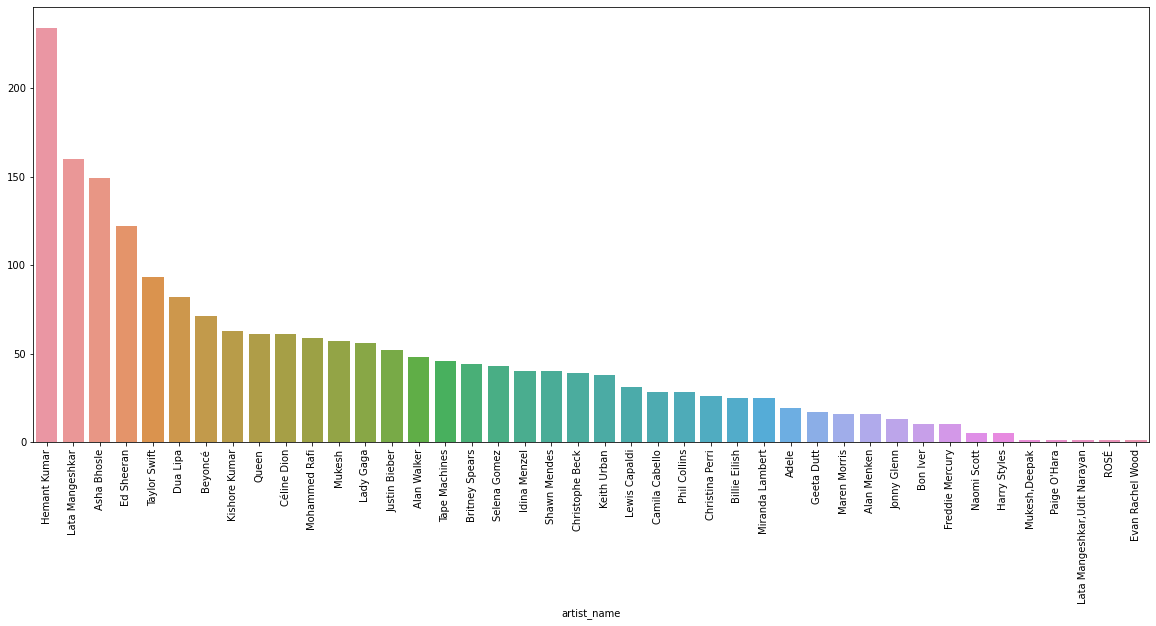

In [151]:
plt.figure(figsize=(20,8))
sns.barplot(all_albums.value_counts("artist_name").index, all_albums.value_counts("artist_name").values)
plt.xticks(rotation=90);

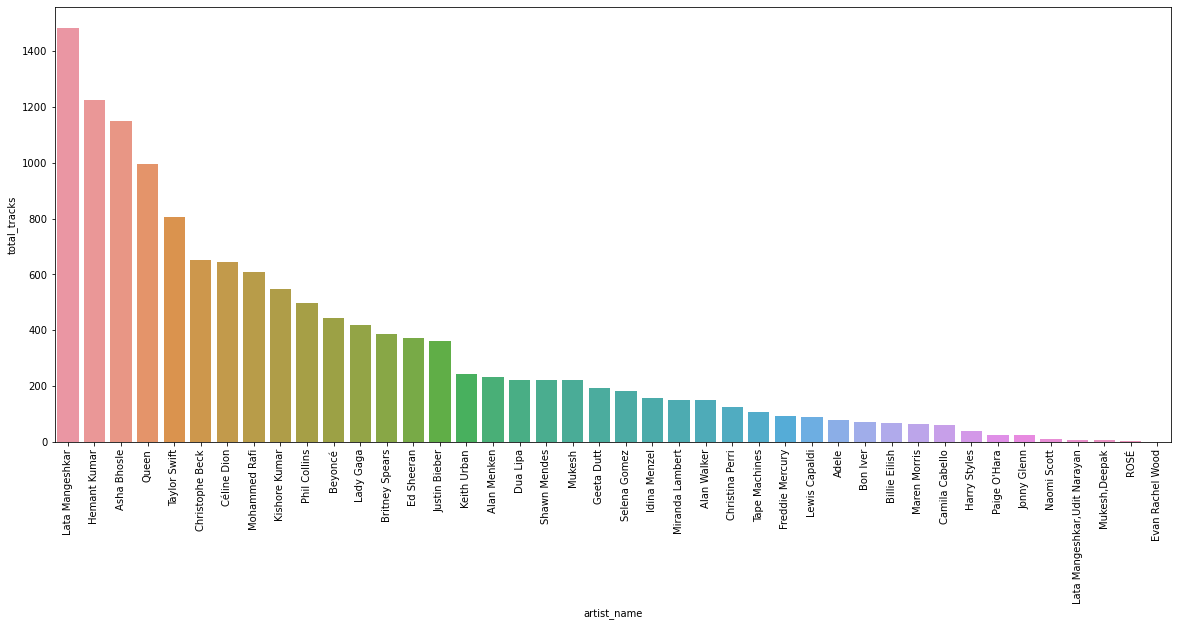

In [155]:
all_songs = all_albums.groupby("artist_name").agg({"total_tracks": "sum"}).sort_values("total_tracks", ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(all_songs.index, all_songs["total_tracks"])
plt.xticks(rotation=90);

In [157]:
all_albums["total_tracks"].sum()

13445

## Songs

The details needed for a single song are:
1. ID
2. Name
3. Album
4. Track Number
5. Duration
6. Artist
7. Album ID
8. Artist ID
9. Audio Url
10. Spotify URL

In [164]:
red = all_albums.iloc[250]["album_id"]
red

'1KVKqWeRuXsJDLTW0VuD29'

In [177]:
album_name = all_albums.iloc[250]["album_name"]

In [166]:
red_songs = sp.album_tracks(red)

In [167]:
ss = pd.DataFrame(red_songs["items"])
ss.head(2).T

,0,1
artists,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...
available_markets,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...","[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B..."
disc_number,1,1
duration_ms,295720,223093
explicit,False,False
external_urls,{'spotify': 'https://open.spotify.com/track/0b...,{'spotify': 'https://open.spotify.com/track/7g...
href,https://api.spotify.com/v1/tracks/0b16LTzby1YR...,https://api.spotify.com/v1/tracks/7gJtmLyPTwKz...
id,0b16LTzby1YRVd2nq2Z0fw,7gJtmLyPTwKzhGzMBXtuXH
is_local,False,False
name,State Of Grace,Red


In [173]:
ss2 = ss[["id", "name", "duration_ms", "track_number", "artists", "preview_url", "external_urls", "uri"]]
ss2.head(2).T

,0,1
id,0b16LTzby1YRVd2nq2Z0fw,7gJtmLyPTwKzhGzMBXtuXH
name,State Of Grace,Red
duration_ms,295720,223093
track_number,1,2
artists,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...
preview_url,https://p.scdn.co/mp3-preview/a46d661ece28569e...,https://p.scdn.co/mp3-preview/63aa831dcc14b536...
external_urls,{'spotify': 'https://open.spotify.com/track/0b...,{'spotify': 'https://open.spotify.com/track/7g...
uri,spotify:track:0b16LTzby1YRVd2nq2Z0fw,spotify:track:7gJtmLyPTwKzhGzMBXtuXH


In [174]:
ss2["artist_name"] = ss2["artists"].apply(lambda x: x[0]["name"])
ss2["artist_id"] = ss2["artists"].apply(lambda x: x[0]["id"])
ss2["spotify_url"] = ss2["external_urls"].apply(lambda x: x["spotify"])
ss2.drop(["artists", "external_urls"], axis=1, inplace=True)
ss2.head(2).T

,0,1
id,0b16LTzby1YRVd2nq2Z0fw,7gJtmLyPTwKzhGzMBXtuXH
name,State Of Grace,Red
duration_ms,295720,223093
track_number,1,2
preview_url,https://p.scdn.co/mp3-preview/a46d661ece28569e...,https://p.scdn.co/mp3-preview/63aa831dcc14b536...
uri,spotify:track:0b16LTzby1YRVd2nq2Z0fw,spotify:track:7gJtmLyPTwKzhGzMBXtuXH
artist_name,Taylor Swift,Taylor Swift
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02
spotify_url,https://open.spotify.com/track/0b16LTzby1YRVd2...,https://open.spotify.com/track/7gJtmLyPTwKzhGz...


In [176]:
all_albums[all_albums["album_id"] == red]["album_name"].values[0]

'Red (Deluxe Edition)'

In [178]:
ss2["albums_id"] = red
ss2["albums_name"] = album_name

In [179]:
ss2.head(2).T

,0,1
id,0b16LTzby1YRVd2nq2Z0fw,7gJtmLyPTwKzhGzMBXtuXH
name,State Of Grace,Red
duration_ms,295720,223093
track_number,1,2
preview_url,https://p.scdn.co/mp3-preview/a46d661ece28569e...,https://p.scdn.co/mp3-preview/63aa831dcc14b536...
uri,spotify:track:0b16LTzby1YRVd2nq2Z0fw,spotify:track:7gJtmLyPTwKzhGzMBXtuXH
artist_name,Taylor Swift,Taylor Swift
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02
spotify_url,https://open.spotify.com/track/0b16LTzby1YRVd2...,https://open.spotify.com/track/7gJtmLyPTwKzhGz...
albums_id,1KVKqWeRuXsJDLTW0VuD29,1KVKqWeRuXsJDLTW0VuD29


In [180]:
ss2.columns = ["song_id", "song_name", "duration_ms", "track_number", "preview_url", "song_uri", "artist_name", "artist_id", "spotify_url", "albums_id", "albums_name"]

In [184]:
def songs_in_one_album(album_id):
    ss = pd.DataFrame(sp.album_tracks(album_id)["items"])
    ss2 = ss[["id", "name", "duration_ms", "track_number", "artists", "preview_url", "external_urls", "uri"]]
    ss2["artist_id"] = ss2["artists"].apply(lambda x: x[0]["id"])
    ss2["spotify_url"] = ss2["external_urls"].apply(lambda x: x["spotify"])
    ss2.drop(["artists", "external_urls"], axis=1, inplace=True)
    ss2["albums_id"] = album_id
    ss2.columns = ["song_id", "song_name", "duration_ms", "track_number", "preview_url", "song_uri", "artist_id", "spotify_url", "albums_id"]
    return ss2

In [185]:
red_album_songs = songs_in_one_album(red)

In [191]:
red_album_songs.head(2).T

,0,1
song_id,0b16LTzby1YRVd2nq2Z0fw,7gJtmLyPTwKzhGzMBXtuXH
song_name,State Of Grace,Red
duration_ms,295720,223093
track_number,1,2
preview_url,https://p.scdn.co/mp3-preview/a46d661ece28569e...,https://p.scdn.co/mp3-preview/63aa831dcc14b536...
song_uri,spotify:track:0b16LTzby1YRVd2nq2Z0fw,spotify:track:7gJtmLyPTwKzhGzMBXtuXH
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02
spotify_url,https://open.spotify.com/track/0b16LTzby1YRVd2...,https://open.spotify.com/track/7gJtmLyPTwKzhGz...
albums_id,1KVKqWeRuXsJDLTW0VuD29,1KVKqWeRuXsJDLTW0VuD29


Let's get all the songs of Taylor Swift.

In [196]:
taylor_id = artists[artists["artist_name"]=="Taylor Swift"]["artist_id"].values[0]

In [198]:
all_albums

,album_id,album_name,total_tracks,release_date,album_uri,artist_name,spotify_url,image_url
0,4DvNMpnlo9GoWiTJWMfRAA,Ogo Chirabedanar Sathi - Hemanta Mukherjee,7,2022-05-04,spotify:album:4DvNMpnlo9GoWiTJWMfRAA,Hemant Kumar,https://open.spotify.com/album/4DvNMpnlo9GoWiT...,https://i.scdn.co/image/ab67616d0000b27308b9a7...
1,2YOOgRzDIgOp0kdZACTVFc,Olo Soi Dekhey Jarey Dekhey Ja,17,2020-09-30,spotify:album:2YOOgRzDIgOp0kdZACTVFc,Hemant Kumar,https://open.spotify.com/album/2YOOgRzDIgOp0kd...,https://i.scdn.co/image/ab67616d0000b2732c2ff2...
2,3aXxkiwm7EBXRXiM3xMcpX,Eso Amar Ghare,18,2020-01-06,spotify:album:3aXxkiwm7EBXRXiM3xMcpX,Hemant Kumar,https://open.spotify.com/album/3aXxkiwm7EBXRXi...,https://i.scdn.co/image/ab67616d0000b273782940...
3,0ixRvfbmnmd4hBYCDzMljp,Moli (Original Motion Picture Soundtrack),8,2011-04-01,spotify:album:0ixRvfbmnmd4hBYCDzMljp,Hemant Kumar,https://open.spotify.com/album/0ixRvfbmnmd4hBY...,https://i.scdn.co/image/ab67616d0000b273c8621b...
4,5b6jzg1UcSFNheady0Md24,Saikat Mukherjee With His Golden Harmonica,37,2008-11-01,spotify:album:5b6jzg1UcSFNheady0Md24,Hemant Kumar,https://open.spotify.com/album/5b6jzg1UcSFNhea...,https://i.scdn.co/image/ab67616d0000b27340580f...
...,...,...,...,...,...,...,...,...
44,4YWOoI3Fy2Mv2COZMiYN00,Routine,2,2016-11-30,spotify:album:4YWOoI3Fy2Mv2COZMiYN00,Alan Walker,https://open.spotify.com/album/4YWOoI3Fy2Mv2CO...,https://i.scdn.co/image/ab67616d0000b2737fa79a...
45,1VWr0FAjHzvpcBkIyprVOe,Faded (Lost Stories Remix),1,2016-07-29,spotify:album:1VWr0FAjHzvpcBkIyprVOe,Alan Walker,https://open.spotify.com/album/1VWr0FAjHzvpcBk...,https://i.scdn.co/image/ab67616d0000b2734bce56...
46,4wQNBX0Mp50Q2JFSEDW5G1,Sing Me to Sleep,3,2016-06-03,spotify:album:4wQNBX0Mp50Q2JFSEDW5G1,Alan Walker,https://open.spotify.com/album/4wQNBX0Mp50Q2JF...,https://i.scdn.co/image/ab67616d0000b27325d3bd...
47,1iyzvyJg2grVy8cMdRSL08,Faded (Remixes),8,2016-04-29,spotify:album:1iyzvyJg2grVy8cMdRSL08,Alan Walker,https://open.spotify.com/album/1iyzvyJg2grVy8c...,https://i.scdn.co/image/ab67616d0000b2730aacfe...


In [228]:
taylor_albums = all_albums[all_albums["artist_id"]==taylor_id]
taylor_albums.head(2).T

,0,2
album_id,6kZ42qRrzov54LcAk4onW9,4hDok0OAJd57SGIT8xuWJH
album_name,Red (Taylor's Version),Fearless (Taylor's Version)
total_tracks,30,26
release_date,2021-11-12,2021-04-09
album_uri,spotify:album:6kZ42qRrzov54LcAk4onW9,spotify:album:4hDok0OAJd57SGIT8xuWJH
spotify_url,https://open.spotify.com/album/6kZ42qRrzov54Lc...,https://open.spotify.com/album/4hDok0OAJd57SGI...
image_url,https://i.scdn.co/image/ab67616d0000b273318443...,https://i.scdn.co/image/ab67616d0000b273a48964...
artist_id,06HL4z0CvFAxyc27GXpf02,06HL4z0CvFAxyc27GXpf02


In [229]:
taylor_songs = pd.DataFrame()
taylor_albums = taylor_albums["album_id"].tolist()
for album in taylor_albums:
    print(album, end = "\r")
    # taylor_songs = taylor_songs.append(songs_in_one_album(album))
    taylor_songs = taylor_songs.append(songs_in_one_album(album))

We have to filter the duplicate songs.

In [233]:
taylor_songs.reset_index(drop=True, inplace=True)
taylor_songs.index

RangeIndex(start=0, stop=807, step=1)

In [235]:
taylor_songs.iloc[taylor_songs["song_name"].drop_duplicates().index]

,song_id,song_name,duration_ms,track_number,preview_url,song_uri,artist_id,spotify_url,albums_id
0,6lzc0Al0zfZOIFsFvBS1ki,State Of Grace (Taylor's Version),295413,1,https://p.scdn.co/mp3-preview/88abf66bfd37e650...,spotify:track:6lzc0Al0zfZOIFsFvBS1ki,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/6lzc0Al0zfZOIFs...,6kZ42qRrzov54LcAk4onW9
1,4OAuvHryIVv4kMDNSLuPt6,Red (Taylor's Version),223093,2,https://p.scdn.co/mp3-preview/23a932861372fabe...,spotify:track:4OAuvHryIVv4kMDNSLuPt6,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/4OAuvHryIVv4kMD...,6kZ42qRrzov54LcAk4onW9
2,3S7HNKPakdwNEBFIVTL6dZ,Treacherous (Taylor's Version),242720,3,https://p.scdn.co/mp3-preview/6752b5cd003d2717...,spotify:track:3S7HNKPakdwNEBFIVTL6dZ,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/3S7HNKPakdwNEBF...,6kZ42qRrzov54LcAk4onW9
3,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),219760,4,https://p.scdn.co/mp3-preview/cde757ea5ab8405d...,spotify:track:6AtZLIzUINvExIUy4QhdjP,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/6AtZLIzUINvExIU...,6kZ42qRrzov54LcAk4onW9
4,3nsfB1vus2qaloUdcBZvDu,All Too Well (Taylor's Version),329160,5,https://p.scdn.co/mp3-preview/9a31bc4eec73017a...,spotify:track:3nsfB1vus2qaloUdcBZvDu,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/3nsfB1vus2qaloU...,6kZ42qRrzov54LcAk4onW9
...,...,...,...,...,...,...,...,...,...
716,7GZ3KDorsc1yWndEtzGTjf,White Christmas,154000,6,https://p.scdn.co/mp3-preview/adfeca20976413e2...,spotify:track:7GZ3KDorsc1yWndEtzGTjf,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/7GZ3KDorsc1yWnd...,7vzYp7FrKnTRoktBYsx9SF
770,3IxAFD3NO9vUqJpL0xH3kc,right where you left me,245026,6,https://p.scdn.co/mp3-preview/c54b846d79927748...,spotify:track:3IxAFD3NO9vUqJpL0xH3kc,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/3IxAFD3NO9vUqJp...,29TDKlVwdu8TqifC3WN86l
779,6RvmQShxVQwJ0AWMtP6JoU,it’s time to go,254640,3,https://p.scdn.co/mp3-preview/2409e3f9dc7c7ffa...,spotify:track:6RvmQShxVQwJ0AWMtP6JoU,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/6RvmQShxVQwJ0AW...,0MdAkmLrx2k4zgACOUVyM9
795,3TByueS9ydlgwfYbiWBdIC,exile,285640,1,https://p.scdn.co/mp3-preview/dd57bcc0bc321dee...,spotify:track:3TByueS9ydlgwfYbiWBdIC,06HL4z0CvFAxyc27GXpf02,https://open.spotify.com/track/3TByueS9ydlgwfY...,3V35ukro7RnYjnscZ56pRB


In [240]:
def songs_of_one_artist(artist_id):
    artist_albums = all_albums[all_albums["artist_id"]==artist_id]
    artist_songs = pd.DataFrame()
    artist_albums = artist_albums["album_id"].tolist()
    i=1
    for album in artist_albums:
        print(f"{i}, {album}", end = "\r")
        artist_songs = artist_songs.append(songs_in_one_album(album))
        i+=1
    artist_songs.reset_index(drop=True, inplace=True)
    artist_songs.iloc[artist_songs["song_name"].drop_duplicates().index]
    return artist_songs

In [241]:
adele_id = artists[artists["artist_name"]=="Adele"]["artist_id"].values[0]
adele_id

'4dpARuHxo51G3z768sgnrY'

In [242]:
adele_songs = songs_of_one_artist(adele_id)

In [243]:
adele_songs

,song_id,song_name,duration_ms,track_number,preview_url,song_uri,artist_id,spotify_url,albums_id
0,13CVSGLSFl4UxpDVR6u3dq,Strangers By Nature,182163,1,https://p.scdn.co/mp3-preview/72ba150b45e1fe59...,spotify:track:13CVSGLSFl4UxpDVR6u3dq,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/13CVSGLSFl4UxpD...,21jF5jlMtzo94wbxmJ18aa
1,46IZ0fSY2mpAiktS3KOqds,Easy On Me,224694,2,https://p.scdn.co/mp3-preview/3ca514309c910bb7...,spotify:track:46IZ0fSY2mpAiktS3KOqds,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/46IZ0fSY2mpAikt...,21jF5jlMtzo94wbxmJ18aa
2,2DuPBbS5mIldXnh7Wum8Cy,My Little Love,389107,3,https://p.scdn.co/mp3-preview/995a83fed4904b46...,spotify:track:2DuPBbS5mIldXnh7Wum8Cy,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/2DuPBbS5mIldXnh...,21jF5jlMtzo94wbxmJ18aa
3,09u787BYeYIGd2mFIJ505t,Cry Your Heart Out,255278,4,https://p.scdn.co/mp3-preview/45586d8a8694c745...,spotify:track:09u787BYeYIGd2mFIJ505t,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/09u787BYeYIGd2m...,21jF5jlMtzo94wbxmJ18aa
4,3Kkjo3cT83cw09VJyrLNwX,Oh My God,225148,5,https://p.scdn.co/mp3-preview/52c6f8030e09af6b...,spotify:track:3Kkjo3cT83cw09VJyrLNwX,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/3Kkjo3cT83cw09V...,21jF5jlMtzo94wbxmJ18aa
...,...,...,...,...,...,...,...,...,...
75,0z683d5Rr94WFcvTuZNyJk,Cold Shoulder,191866,1,https://p.scdn.co/mp3-preview/c377d859bc86088c...,spotify:track:0z683d5Rr94WFcvTuZNyJk,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/0z683d5Rr94WFcv...,4YMrTIN63eXAKvA3ITiKyb
76,1tA28mIuov0a324hUZqvaG,Cold Shoulder - Basement Jaxx Classic Remix,301493,2,https://p.scdn.co/mp3-preview/ce9a1da093dddd6d...,spotify:track:1tA28mIuov0a324hUZqvaG,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/1tA28mIuov0a324...,4YMrTIN63eXAKvA3ITiKyb
77,6GAGvtUEth1LIik6zNwso9,Cold Shoulder - Basement Jaxx DUBB,410840,3,https://p.scdn.co/mp3-preview/9c763fae91b85634...,spotify:track:6GAGvtUEth1LIik6zNwso9,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/6GAGvtUEth1LIik...,4YMrTIN63eXAKvA3ITiKyb
78,2nqcDdon1kWmGfzVNOVWqs,Cold Shoulder - Rusko Remix,247093,4,https://p.scdn.co/mp3-preview/b3e54fa1796d36e8...,spotify:track:2nqcDdon1kWmGfzVNOVWqs,4dpARuHxo51G3z768sgnrY,https://open.spotify.com/track/2nqcDdon1kWmGfz...,4YMrTIN63eXAKvA3ITiKyb
